# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
#Every union member has a savings portfolio composed of cryptocurrencies, stocks and bonds:
#Assume the following amount of crypto assets: 1.2 BTC and 5.3 ETH.
BTC_amount = 1.2
ETH_amount = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Execute GET request and store response
btc_info = requests.get(btc_url)
eth_info = requests.get(eth_url)

In [5]:
# Get content
btc_content = btc_info.content
eth_content = eth_info.content

# Import Json library
import json

# Remove 'bytes' object to convert it to 'json'
btc_data = json.loads(btc_content.decode('utf-8'))
eth_data = json.loads(eth_content.decode('utf-8'))

In [6]:
# Fetch current BTC price
btc_price=btc_data["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
eth_price=eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
# Compute current value of my crpto
my_btc_value = btc_price*BTC_amount
my_eth_value = eth_price*ETH_amount

# Print current crypto wallet balance
print(f"The current value of your {BTC_amount} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {ETH_amount} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $28721.54
The current value of your 5.3 ETH is $4249.56


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
#Assume the following amount of shares in stocks and bonds: 50 SPY (stocks) and 200 AGG (bonds).
SPY_amount = 50
AGG_amount = 200 

In [8]:
# Load .env environment variables
load_dotenv()

True

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Test if the keys work
print (type(alpaca_api_key))
print (type(alpaca_secret_key))

# Create the Alpaca API object
Alpaca_object = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version = "v2" )

<class 'str'>
<class 'str'>


In [10]:
# Format current date as ISO format
today= pd.Timestamp("2020-10-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = Alpaca_object.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
portfolio_df.head()


AGG                                       SPY  \
                            open    high      low   close   volume    open   
2020-10-14 00:00:00-04:00  118.1  118.11  117.985  118.04  3295967  350.75   

                                                             
                             high     low   close    volume  
2020-10-14 00:00:00-04:00  351.93  347.14  347.97  47281475

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio_df["AGG"]["close"])
spy_close_price = float(portfolio_df["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.04
Current SPY closing price: $347.97


In [12]:
# Compute the current value of shares
my_spy_value = SPY_amount *spy_close_price
my_agg_value = AGG_amount *agg_close_price
# Print current value of share
print(f"The current value of your {SPY_amount} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {AGG_amount} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17398.50
The current value of your 200 AGG shares is $23608.00


### Savings Health Analysis

In [13]:
# Set monthly household income

#The average household income for each member of the credit union is $12,000
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame()

# Calc values of crypto and share respectively, and save it to dataframe
my_crypto_value = round(my_btc_value + my_eth_value, 2)
my_share_value = round(my_agg_value + my_spy_value,2)
df_savings["amount"] = [my_crypto_value,my_share_value]

# Change index to ["crypto","share"]
df_savings.index = ["crypto","shares"]

# Display savings DataFrame
display(df_savings)

,amount
crypto,32971.1
shares,41006.5


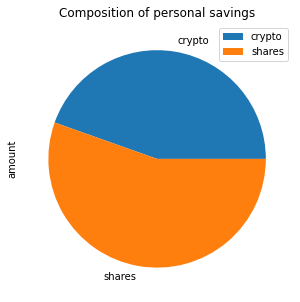

In [14]:
# Plot savings pie chart
df_savings.plot(kind="pie", y= "amount", title ="Composition of personal savings", figsize=[10,5])

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving = df_savings["amount"].sum()

# Validate saving health
#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
if total_saving >emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
elif total_saving == emergency_fund:
    print("Congratulations! You reach the financial goal.")

#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
else:
    print(f" You are ${round(emergency_fund - total_saving, 2)} dollars away from reaching the goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-14', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data=  Alpaca_object.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562.0   

                              SPY                                      
                             open    high       low   close    volume  
2015-10-14 00:00:00-04:00  200.18  200.87  198.9400  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.6400  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.9200  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.1300  203.33  61255929  
2015-10-20 00:00:00-04:00  202.85  203.84  202.5471  203.07  60081395

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
portfolio_data = df_stock_data
MC_object= MCSimulation(portfolio_data, 
                        weights=[0.4, 0.6],
                        num_simulation=500, 
                        num_trading_days=252*30)

In [19]:
# Printing the simulation input data
MC_object.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.87  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_object.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000400,1.004623,1.003078,0.994444,0.996009,0.999016,1.000394,1.002955,0.996960,0.986504,...,1.001457,0.986625,1.003926,1.004066,0.998634,1.019594,1.001381,0.997642,0.997980,0.999262
2,1.007982,1.012424,0.995415,0.981670,0.999197,0.992890,1.005482,1.003840,1.001399,0.988593,...,0.991193,0.986998,1.013983,1.018605,0.999959,1.021387,0.991797,0.999354,0.993994,1.000825
3,1.005186,1.015851,1.001453,0.984620,1.008207,0.992002,1.003064,1.003659,1.000223,0.994065,...,0.992030,0.983355,1.002482,1.021339,1.002043,1.029066,0.990563,1.002419,1.001174,1.015866
4,1.003600,1.024538,0.997185,0.991432,0.995917,0.986102,1.013777,1.007412,1.001188,1.009685,...,0.985586,0.987438,0.998226,1.035636,0.999649,1.023501,1.001244,0.999752,1.007929,1.017289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.183216,13.793087,9.530808,27.876809,6.943168,9.890174,9.072576,11.578647,12.372790,15.512241,...,8.800707,5.331252,13.758434,10.026113,11.818015,25.782598,12.492311,15.095697,20.002557,9.137262
7557,14.167227,13.904990,9.615396,27.930610,6.938659,9.979910,9.076361,11.442559,12.431187,15.374117,...,8.672019,5.272646,13.876440,9.967462,11.814878,25.983150,12.575232,14.864971,19.999043,9.254306
7558,14.264884,13.880067,9.740794,28.203056,6.933074,9.928305,8.995306,11.402499,12.416077,15.439458,...,8.699331,5.260193,13.797355,9.974161,11.736153,25.647957,12.556901,14.729306,20.127950,9.294393
7559,14.416572,13.685015,9.697038,28.532830,6.882445,9.889199,9.002717,11.294694,12.434871,15.354315,...,8.723871,5.276484,13.809371,9.940491,11.774922,25.884843,12.614488,14.700805,20.052396,9.343202


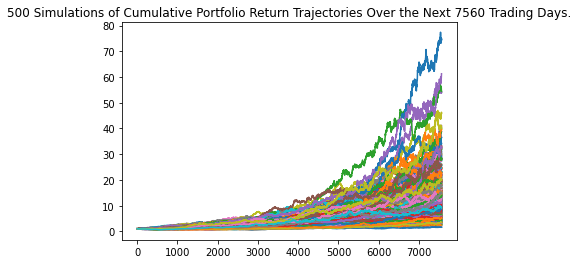

In [21]:
# Plot simulation outcomes
outcomes_plot = MC_object.plot_simulation()

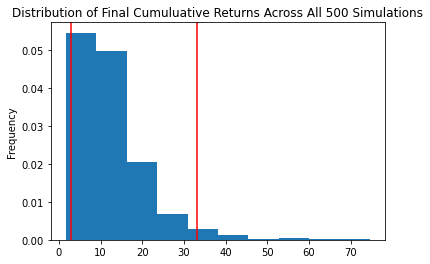

In [22]:
# Plot probability distribution and confidence intervals
probability_plot = MC_object.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary = MC_object.summarize_cumulative_return()

# Print summary statistics
print (MC_summary)

count           500.000000
mean             12.715628
std               8.735295
min               1.650127
25%               6.911675
50%              10.669781
75%              15.828470
max              74.654953
95% CI Lower      3.007911
95% CI Upper     33.042942
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = MC_summary[8] * initial_investment
ci_upper = MC_summary[9]* initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower,2)} and ${round(ci_upper,2)}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60158.21 and $660858.85


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
new_initial_investment = initial_investment * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = MC_summary[8] * new_initial_investment
ci_upper = MC_summary[9]* new_initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${int(new_initial_investment)} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${round(ci_lower,2)} and ${round(ci_upper,2)}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $90237.32 and $991288.27


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
portfolio_data = df_stock_data
MC_5_year= MCSimulation(portfolio_data, 
                        weights=[0.4, 0.6],
                        num_simulation=500, 
                        num_trading_days=252*5)
MC_5_year.portfolio_data

AGG                                          \
                             open      high       low    close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.030  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.890  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.780  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.850  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.650  1672562.0   
...                           ...       ...       ...      ...        ...   
2020-10-08 00:00:00-04:00  117.67  117.7100  117.5900  117.690  3580248.0   
2020-10-09 00:00:00-04:00  117.65  117.7400  117.5000  117.705  2750029.0   
2020-10-12 00:00:00-04:00  117.85  117.9400  117.7700  117.930  2770157.0   
2020-10-13 00:00:00-04:00  118.01  118.0700  117.9294  118.010  3250338.0   
2020-10-14 00:00:00-04:00  118.10  118.1100  117.9850  118.040  3295967.0   

                                           SPY                              \
                          daily_return    open      high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.8700  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.3400  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.2900  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.3700  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.8400  202.5471  203.07   
...                                ...     ...       ...       ...     ...   
2020-10-08 00:00:00-04:00     0.001361  342.85  343.8500  341.8600  343.73   
2020-10-09 00:00:00-04:00     0.000127  345.56  347.3500  344.8900  346.84   
2020-10-12 00:00:00-04:00     0.001912  349.59  354.0200  349.0600  352.43   
2020-10-13 00:00:00-04:00     0.000678  352.28  352.4651  349.0900  350.15   
2020-10-14 00:00:00-04:00     0.000254  350.75  351.9300  347.1400  347.97   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279  
...                             ...          ...  
2020-10-08 00:00:00-04:00  35858727     0.008805  
2020-10-09 00:00:00-04:00  45969566     0.009048  
2020-10-12 00:00:00-04:00  61163344     0.016117  
2020-10-13 00:00:00-04:00  62272512    -0.006469  
2020-10-14 00:00:00-04:00  47281475    -0.006226  

[1260 rows x 12 columns]

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011328,0.998638,1.003902,1.011115,0.995885,1.009535,1.006662,0.990498,1.009130,0.995020,...,0.993009,0.996778,1.005235,0.996082,0.994911,0.993174,1.006838,1.003502,1.000135,1.004026
2,1.020833,0.999919,0.997488,0.998242,0.999540,1.012009,1.011582,0.978081,1.010228,0.985035,...,0.989205,1.010065,1.008942,0.992565,0.989991,1.002154,1.002099,1.005006,0.998153,1.003246
3,1.006541,0.999734,1.006626,0.999997,1.003961,1.010951,1.018923,0.989153,1.014269,0.982521,...,0.991634,1.009401,1.003789,0.987512,0.995672,1.004733,1.003279,1.003750,0.989039,1.002511
4,1.014348,0.992443,1.024701,1.019166,1.004432,1.007869,1.024409,0.987897,1.034915,0.967757,...,0.987358,1.020311,1.006420,0.986732,0.996624,0.999790,1.004135,1.001969,0.988165,1.000171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.342254,1.929745,2.655818,1.682064,1.746962,1.532777,1.291322,1.363196,1.613891,1.241337,...,1.035888,1.520305,1.052014,1.767818,1.537404,1.081063,2.029711,1.613900,1.796542,2.241128
1257,2.334280,1.917304,2.665406,1.669702,1.763266,1.515827,1.278381,1.367438,1.632327,1.247653,...,1.035771,1.501038,1.064697,1.763620,1.538398,1.068297,2.037916,1.610133,1.793978,2.229496
1258,2.335020,1.917861,2.661284,1.660326,1.750692,1.508734,1.269569,1.352759,1.620251,1.254341,...,1.019946,1.512551,1.054313,1.755380,1.531944,1.061850,2.004073,1.605884,1.776080,2.211836
1259,2.338975,1.912847,2.670210,1.678043,1.746951,1.520495,1.258067,1.359220,1.631139,1.245264,...,1.009056,1.496969,1.058305,1.744340,1.559622,1.059945,2.017278,1.604003,1.788103,2.206576


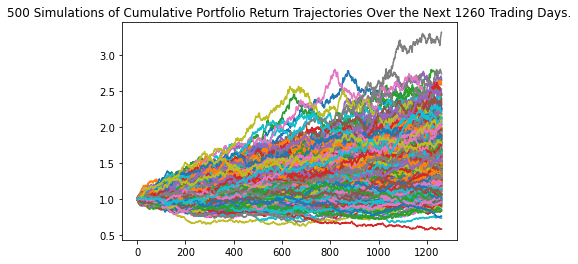

In [28]:
# Plot simulation outcomes
outcomes_5_year_plot = MC_5_year.plot_simulation()

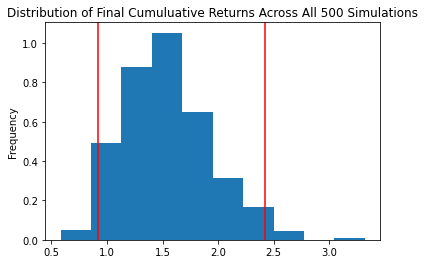

In [29]:
# Plot probability distribution and confidence intervals
probability_5_year_plot = MC_5_year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5_year_Summary = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(MC_5_year_Summary)


count           500.000000
mean              1.540101
std               0.393719
min               0.582195
25%               1.260732
50%               1.498611
75%               1.786445
max               3.320097
95% CI Lower      0.917233
95% CI Upper      2.422697
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_5_year = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = initial_investment_5_year*MC_5_year_Summary[8]
ci_upper_five = initial_investment_5_year*MC_5_year_Summary[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5_year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${round(ci_lower_five,2)} and ${round(ci_upper_five,2)}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55034.0 and $145361.81


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

portfolio_data = df_stock_data
MC_10_year= MCSimulation(portfolio_data, 
                        weights=[0.4, 0.6],
                        num_simulation=500, 
                        num_trading_days=252*10)
MC_10_year.portfolio_data

AGG                                          \
                             open      high       low    close     volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.030  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.890  1792325.0   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.780  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.850  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.650  1672562.0   
...                           ...       ...       ...      ...        ...   
2020-10-08 00:00:00-04:00  117.67  117.7100  117.5900  117.690  3580248.0   
2020-10-09 00:00:00-04:00  117.65  117.7400  117.5000  117.705  2750029.0   
2020-10-12 00:00:00-04:00  117.85  117.9400  117.7700  117.930  2770157.0   
2020-10-13 00:00:00-04:00  118.01  118.0700  117.9294  118.010  3250338.0   
2020-10-14 00:00:00-04:00  118.10  118.1100  117.9850  118.040  3295967.0   

                                           SPY                              \
                          daily_return    open      high       low   close   
2015-10-14 00:00:00-04:00          NaN  200.18  200.8700  198.9400  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.3400  199.6400  202.33   
2015-10-16 00:00:00-04:00    -0.001001  202.83  203.2900  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.3700  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.8400  202.5471  203.07   
...                                ...     ...       ...       ...     ...   
2020-10-08 00:00:00-04:00     0.001361  342.85  343.8500  341.8600  343.73   
2020-10-09 00:00:00-04:00     0.000127  345.56  347.3500  344.8900  346.84   
2020-10-12 00:00:00-04:00     0.001912  349.59  354.0200  349.0600  352.43   
2020-10-13 00:00:00-04:00     0.000678  352.28  352.4651  349.0900  350.15   
2020-10-14 00:00:00-04:00     0.000254  350.75  351.9300  347.1400  347.97   

                                                  
                             volume daily_return  
2015-10-14 00:00:00-04:00  82856686          NaN  
2015-10-15 00:00:00-04:00  96008389     0.015356  
2015-10-16 00:00:00-04:00  79323870     0.004003  
2015-10-19 00:00:00-04:00  61255929     0.000935  
2015-10-20 00:00:00-04:00  60081395    -0.001279  
...                             ...          ...  
2020-10-08 00:00:00-04:00  35858727     0.008805  
2020-10-09 00:00:00-04:00  45969566     0.009048  
2020-10-12 00:00:00-04:00  61163344     0.016117  
2020-10-13 00:00:00-04:00  62272512    -0.006469  
2020-10-14 00:00:00-04:00  47281475    -0.006226  

[1260 rows x 12 columns]

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006503,1.004412,0.994657,0.999712,1.001651,1.000256,1.002666,1.007519,1.000670,1.007548,...,1.000523,0.981399,0.999518,0.984061,1.009733,1.010951,0.994583,1.001936,1.003351,1.006275
2,0.999575,1.005210,0.999853,0.998641,1.009570,1.003876,1.006626,0.994928,1.011910,1.006289,...,1.005521,0.985535,1.013469,0.988959,1.013617,0.997315,1.003952,1.010160,0.991606,1.007017
3,0.994413,1.002189,1.003139,0.994069,1.017919,1.005486,1.015525,0.983942,1.016181,0.996859,...,1.009330,0.986357,1.009762,0.980959,1.023792,1.004997,1.012647,1.010816,0.985085,1.013018
4,0.993166,1.006699,0.999173,0.995291,1.011084,1.009646,1.017583,0.985321,1.008776,1.003935,...,1.015585,0.988856,1.015655,0.974622,1.026189,1.003393,1.015686,0.998641,0.981337,1.017492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.807978,1.461650,1.448213,1.591799,2.348317,2.549386,3.311639,2.291257,1.702165,1.377886,...,2.565394,3.305512,2.856892,3.372964,3.741497,2.983899,2.208158,2.356322,2.934015,2.341224
2517,1.811802,1.457647,1.466735,1.623758,2.368750,2.575955,3.323397,2.288690,1.701649,1.377203,...,2.566337,3.326288,2.825042,3.389407,3.774215,2.977668,2.190317,2.367556,2.973372,2.355579
2518,1.813116,1.462575,1.465210,1.632937,2.359941,2.576391,3.309446,2.279979,1.718043,1.380740,...,2.571856,3.332842,2.876972,3.345564,3.788868,2.985656,2.185942,2.416352,3.003155,2.374776
2519,1.828882,1.470317,1.456960,1.645805,2.376393,2.588459,3.304898,2.264131,1.718804,1.396564,...,2.577154,3.346570,2.886396,3.327352,3.759779,2.996701,2.184819,2.396934,2.974743,2.372419


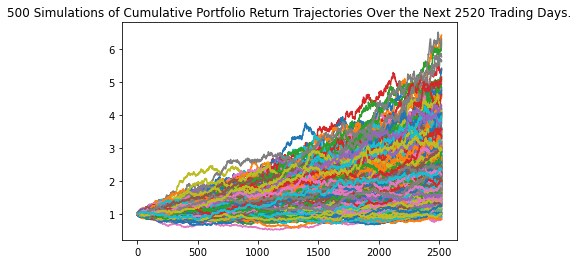

In [34]:
# Plot simulation outcomes
outcome_10_year_plot = MC_10_year.plot_simulation()

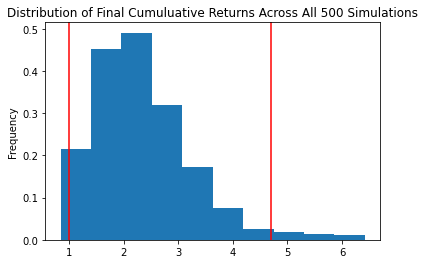

In [35]:
# Plot probability distribution and confidence intervals
probability_10_year_plot = MC_10_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10_year_summary = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(MC_10_year_summary)

count           500.000000
mean              2.355118
std               0.921841
min               0.839699
25%               1.758551
50%               2.175377
75%               2.793740
max               6.419051
95% CI Lower      0.998601
95% CI Upper      4.699852
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment_10_year = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = initial_investment_10_year*MC_10_year_summary[8]
ci_upper_ten = initial_investment_10_year*MC_10_year_summary[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10_year} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${round(ci_lower_ten,2)} and ${round(ci_upper_ten,2)}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59916.08 and $281991.14
